## 1.0 Prerequisite Code

In [ ]:
import pandas as pd
import html
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud


In [ ]:


Dataset = 'amazon_reviews.csv'
Target_Variable = 'overall'

print(Dataset)
print(Target_Variable)


amazon_reviews.csv
overall


<hr>
<br>

## 1.2 Data: Cleansing and Preprocessing (15)


In [ ]:
# Load the dataset
amazon_reviews = pd.read_csv('amazon_reviews.csv')

In [ ]:
amazon_reviews.head()

,asin,reviewerID,reviewText,overall,summary,unixReviewTime,helpful_votes,total_votes,product_brand,product_title,product_price
0,B00002243X,A1R089P5AS26UE,"I have an old car, Its bound to need these som...",5,Beefy,1390348800,0,0,Coleman Cable,Coleman Cable 08662 25-Feet Heavy-Duty Booster...,55.99
1,B00008RW9U,A24EQC4LXYPT4E,Takes the dust off my car without leaving any ...,5,What to say,1400198400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
2,B00008RW9U,A32TGXG3ZWJ4DY,This thing is great. I had another one from a ...,5,The Best,1399248000,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
3,B00008RW9U,A2RO3DC31WU3LY,"As we all know, dust gets over your rides in t...",5,california duster,1401148800,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95
4,B00008RW9U,A1QF996642YT9L,Maybe I don't understand the finer points of k...,3,"cheaply made, picks up some dust but leaves be...",1404086400,0,0,California Car Duster,California Car Duster 62442 Standard Car Duste...,23.95


In [ ]:
# Missing Values
missing_data = amazon_reviews.isnull().sum()
print(missing_data)


asin                 0
reviewerID           0
reviewText           0
overall              0
summary              0
unixReviewTime       0
helpful_votes        0
total_votes          0
product_brand     1586
product_title      779
product_price       66
dtype: int64


In [ ]:
amazon_reviews['product_price'] = amazon_reviews['product_price'].fillna(amazon_reviews['product_price'].median())

In [ ]:
amazon_reviews['product_brand'].fillna('Unknown', inplace=True)

<ipython-input-104-00a573d1e864>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_reviews['product_brand'].fillna('Unknown', inplace=True)


In [ ]:
amazon_reviews.drop(['asin','reviewerID','unixReviewTime','helpful_votes', 'total_votes', 'product_title'], axis=1, inplace=True)

In [ ]:

amazon_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5743 entries, 0 to 5742
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewText     5743 non-null   object 
 1   overall        5743 non-null   int64  
 2   summary        5743 non-null   object 
 3   product_brand  5743 non-null   object 
 4   product_price  5743 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 224.5+ KB


In [ ]:
amazon_reviews['reviewText'] = amazon_reviews['reviewText'].apply(html.unescape)
amazon_reviews['reviewText'] = amazon_reviews['reviewText'].str.replace(r'[^\w\s.,!?]', '', regex=True)

In [ ]:
amazon_reviews.head()

,reviewText,overall,summary,product_brand,product_price
0,"I have an old car, Its bound to need these som...",5,Beefy,Coleman Cable,55.99
1,Takes the dust off my car without leaving any ...,5,What to say,California Car Duster,23.95
2,This thing is great. I had another one from a ...,5,The Best,California Car Duster,23.95
3,"As we all know, dust gets over your rides in t...",5,california duster,California Car Duster,23.95
4,Maybe I dont understand the finer points of ke...,3,"cheaply made, picks up some dust but leaves be...",California Car Duster,23.95




---



## 1.3 Data: Description & EDA (15)





sentiment
1    5062
0     681
Name: count, dtype: int64
Positive label proportion:  0.8814208601776076


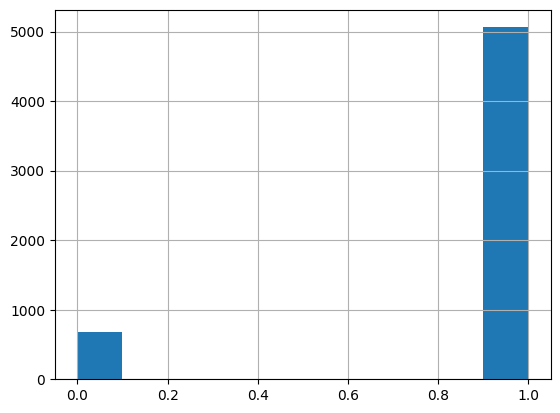

In [ ]:
amazon_reviews['sentiment'] = amazon_reviews['overall'].replace({1:0, 2:0, 3:0, 4:1, 5:1})

print(amazon_reviews['sentiment'].value_counts())

amazon_reviews.sentiment.hist()

print('Positive label proportion: ', amazon_reviews.sentiment.mean())

In [ ]:
# Cluster Analysis
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(amazon_reviews['reviewText'])

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)


labels=model.labels_
amazonreviews_cl = pd.DataFrame(list(zip(amazon_reviews['reviewText'],labels)),columns=['reviewText','cluster'])
amazonreviews_cl

,reviewText,cluster
0,"I have an old car, Its bound to need these som...",0
1,Takes the dust off my car without leaving any ...,1
2,This thing is great. I had another one from a ...,0
3,"As we all know, dust gets over your rides in t...",0
4,Maybe I dont understand the finer points of ke...,1
...,...,...
5738,"I honestly dont think its worth 3, but for fun...",0
5739,very thin material. not very warm at all.. bar...,0
5740,Ive bought 10 of these over the past year to g...,0
5741,"OK, I have to admit, the price of this item di...",0


Cluster: 0


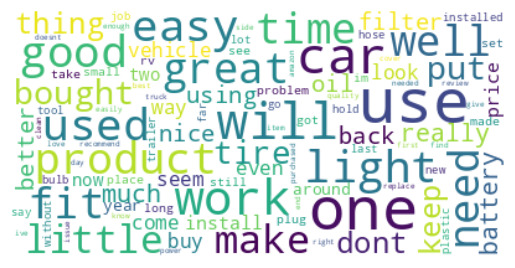

Cluster: 1


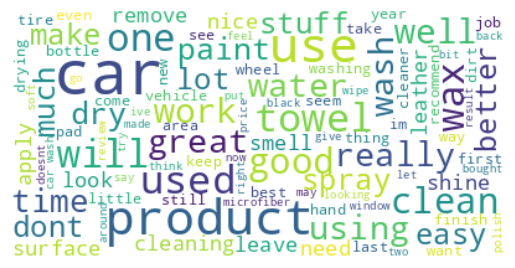

In [ ]:
from wordcloud import WordCloud
result={'cluster':labels,'revText':amazon_reviews['reviewText']}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['revText'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()



---

<br>



In [ ]:
!pip install tensorflow_hub==0.16.1
!pip install tf-keras
!pip install -U tensorflow-text==2.15.*
!pip install -U tf-models-official==2.15.*

In [ ]:

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf
import tensorflow_hub as hub # pre-trained models
import tensorflow_text as text # text pre-processing functions
from official.nlp import optimization
from keras.callbacks import *
from keras.metrics import *
from keras.backend import clear_session
from keras.initializers import Constant
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve

## 2.1 Analysis (25)

In [ ]:
X = amazon_reviews['reviewText']
y = amazon_reviews['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM, AdaBoost, Naive Bayes Models

In [ ]:
names = ["SVM", "AdaBoost", "Naive Bayes"]



classifiers = [SVC(probability=True),
               AdaBoostClassifier(),
               MultinomialNB()
               ]


# BERT Model

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'

tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

bert_model = hub.KerasLayer(tfhub_handle_encoder)

clear_session()

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dense(128,activation='relu')(net)
  net = tf.keras.layers.Dropout(0.2)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
from keras.callbacks import *
loss = tf.keras.losses.BinaryCrossentropy()

METRICS = [
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      AUC(name='prc', curve='PR'), # precision-recall curve
]

epochs = 10
steps_per_epoch = 100
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=METRICS)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model', monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False, verbose=1)


In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=X_train.values,y=y_train,batch_size=128,
                               validation_data=(X_test.values,y_test),verbose=1,callbacks=[es,mc],
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.4786 - accuracy: 0.8142 - precision: 0.8797 - recall: 0.9142 - auc: 0.4857 - prc: 0.8809
Epoch 1: val_loss improved from inf to 0.37267, saving model to best_model
32/32 [==============================] - 76s 2s/step - loss: 0.4786 - accuracy: 0.8142 - precision: 0.8797 - recall: 0.9142 - auc: 0.4857 - prc: 0.8809 - val_loss: 0.3727 - val_accuracy: 0.8810 - val_precision: 0.8810 - val_recall: 1.0000 - val_auc: 0.5744 - val_prc: 0.9088
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.3549 - accuracy: 0.8818 - precision: 0.8818 - recall: 1.0000 - auc: 0.6231 - prc: 0.9191
Epoch 2: val_loss improved from 0.37267 to 0.33230, saving model to best_model
32/32 [==============================] - 64s 2s/step - loss: 0.3549 - accuracy: 0.8818 - precision: 0.8818 - recall: 1.0000 - auc: 0.6231 - prc: 0.9191 - val_los

# **Model Evaluation **

# SVM, AdaBoost, NaiveBayes Models

In [ ]:
for name, clf in zip(names, classifiers):
  clf_pipe = Pipeline([
                    ('tfidf', TfidfVectorizer(min_df=5)),
                    (name, clf),
                    ])

  clf_pipe.fit(X_train,y_train)

  pred = clf_pipe.predict(X_test)
  pred_prob = clf_pipe.predict_proba(X_test)[:, 1]

  fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
  precision, recall, thresholds_pr = precision_recall_curve(y_test, pred)

  print('\n\n', name, '\n\n')
  print(classification_report(y_test, pred))
  print('ROC AUC: ', auc(fpr, tpr))
  print('Precision/Recall AUC: ', auc(precision, recall))
  print('\n\n')




 SVM 


              precision    recall  f1-score   support

           0       1.00      0.01      0.02       205
           1       0.88      1.00      0.94      1518

    accuracy                           0.88      1723
   macro avg       0.94      0.50      0.48      1723
weighted avg       0.90      0.88      0.83      1723

ROC AUC:  0.8441900446672451
Precision/Recall AUC:  0.06000118707050894





/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(




 AdaBoost 


              precision    recall  f1-score   support

           0       0.38      0.18      0.24       205
           1       0.90      0.96      0.93      1518

    accuracy                           0.87      1723
   macro avg       0.64      0.57      0.58      1723
weighted avg       0.83      0.87      0.85      1723

ROC AUC:  0.7487338924772646
Precision/Recall AUC:  0.06476218389526821





 Naive Bayes 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       205
           1       0.88      1.00      0.94      1518

    accuracy                           0.88      1723
   macro avg       0.44      0.50      0.47      1723
weighted avg       0.78      0.88      0.83      1723

ROC AUC:  0.6744689739387513
Precision/Recall AUC:  0.05948926291352291





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# BERT Model

In [ ]:
model_results = classifier_model.evaluate(X_test.values, y_test, batch_size=128, verbose=0)

for name, value in zip(classifier_model.metrics_names, model_results):
  print(name, ': ', value)


loss :  0.34178149700164795
accuracy :  0.8966917991638184
precision :  0.9135802388191223
recall :  0.9749670624732971
auc :  0.8451926708221436
prc :  0.9694931507110596
